# 1.0 Introduction

Our project is focusing on the implementation of Aspect-Based
Sentiment Analysis (ABSA) using the popular Amazon products review datasets. Aspect-Based
Sentiment Analysis (ABSA) is an advanced technique in natural language processing (NLP) that
goes beyond determining the overall sentiment of a text. Instead, it identifies sentiments related
to specific aspects of a product or service mentioned in the text. The example below
demonstrates the difference between Traditional Sentiment Analysis and Aspect-Based
Sentiment Analysis using a sample Hotel Review.  

(INSERT THE  PIC)

This project aims to take traditional sentiment analysis a step further, to dissect customer
reviews into specific sentiment details thereby providing granular and actionable insights into
what aspects customers liked or disliked about the product and service.

# 2.0 Data Collection

The project's initial phase involves collecting and preprocessing Amazon product reviews,
accessible from a well-known repository. This extensive dataset encompasses a wide range of
product categories, from books and arts to beauty and fashion, offering a rich diversity for
analysis. The variety in categories challenges us to develop specialized techniques that go
beyond basic sentiment classification, aiming to extract specific insights related to various
aspects mentioned in the reviews. Implementing this step, we will employ scripts to automate
the download and initial preprocessing of these datasets, ensuring a broad and representative
sample for our analysis.

# 3.0 Exploratory Data Analysis (EDA)

In the initial stage of data preprocessing, it is imperative to conduct a comprehensive examination of the database. This entails thoroughly understanding the structure, content, and quality of the data. By meticulously reviewing the database, we can gain insights into its intricacies, identify any anomalies or inconsistencies, and lay the groundwork for subsequent preprocessing tasks.

The metadata of the review datafiles is available below:

**overall:** rating of the product <br>
**verified:** whether the *ID* or *text* True or False <br>
**reviewTime:** time of the review (raw) <br>
**reviewerID:** ID of the reviewer, e.g. A2SUAM1J3GNN3B <br>
**asin:** ID of the product, e.g. 0000013714 <br>
**style:** a dictionary of the product metadata, e.g., "Format" is "Hardcover" <br>
**reviewerName:** name of the reviewer <br>
**reviewText:** text of the review <br>
**summary:** summary of the review <br>
**unixReviewTime:** time of the review (unix time) <br>
**vote:** helpful votes of the review <br>
**image:** images that users post after they have received the product

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Reading the Dataset

We begin by reading the file into a pandas object for inspection.

In [2]:
Amazon_D  = pd.read_json('AMAZON_FASHION_5.json.gz', lines=True)
Amazon_D.head( )

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


#### Shape of the dataset

Now we will comprehend the size and structure of the dataset.

In [3]:
Amazon_D.shape

(3176, 12)

The dataframe comprises 3176 rows, representing reviews, and 12 columns, representing different fields. However, not all columns are essential for the final task. Consequently, The unnecessary fields will be systematically eliminated.

Now will check the datatypes of the dataframe.

In [4]:
Amazon_D.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         3176 non-null   int64  
 1   verified        3176 non-null   bool   
 2   reviewTime      3176 non-null   object 
 3   reviewerID      3176 non-null   object 
 4   asin            3176 non-null   object 
 5   style           3107 non-null   object 
 6   reviewerName    3176 non-null   object 
 7   reviewText      3160 non-null   object 
 8   summary         3176 non-null   object 
 9   unixReviewTime  3176 non-null   int64  
 10  vote            297 non-null    float64
 11  image           106 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 276.2+ KB


> Here you can see that the "Overall" rating is an integer, Verification is Boolean, "vote" is float and the rest are objects.

### Basic Subsetting

The next step is to subset the data to work with a smaller more meaningful dataset. We will implement the following steps to reduce the size of our dataset.

1. **Verified=True:** We will only work with verified Reviews
2. **Drop Columns:** We will drop non-essential columns
3. **Drop duplicates:** We will also drop duplicates to reduce the size of the reviews

#### Selecting Verified Review

In this step, the dataframe will be filtered to include only the rows where the 'verified' value is **'True'**.

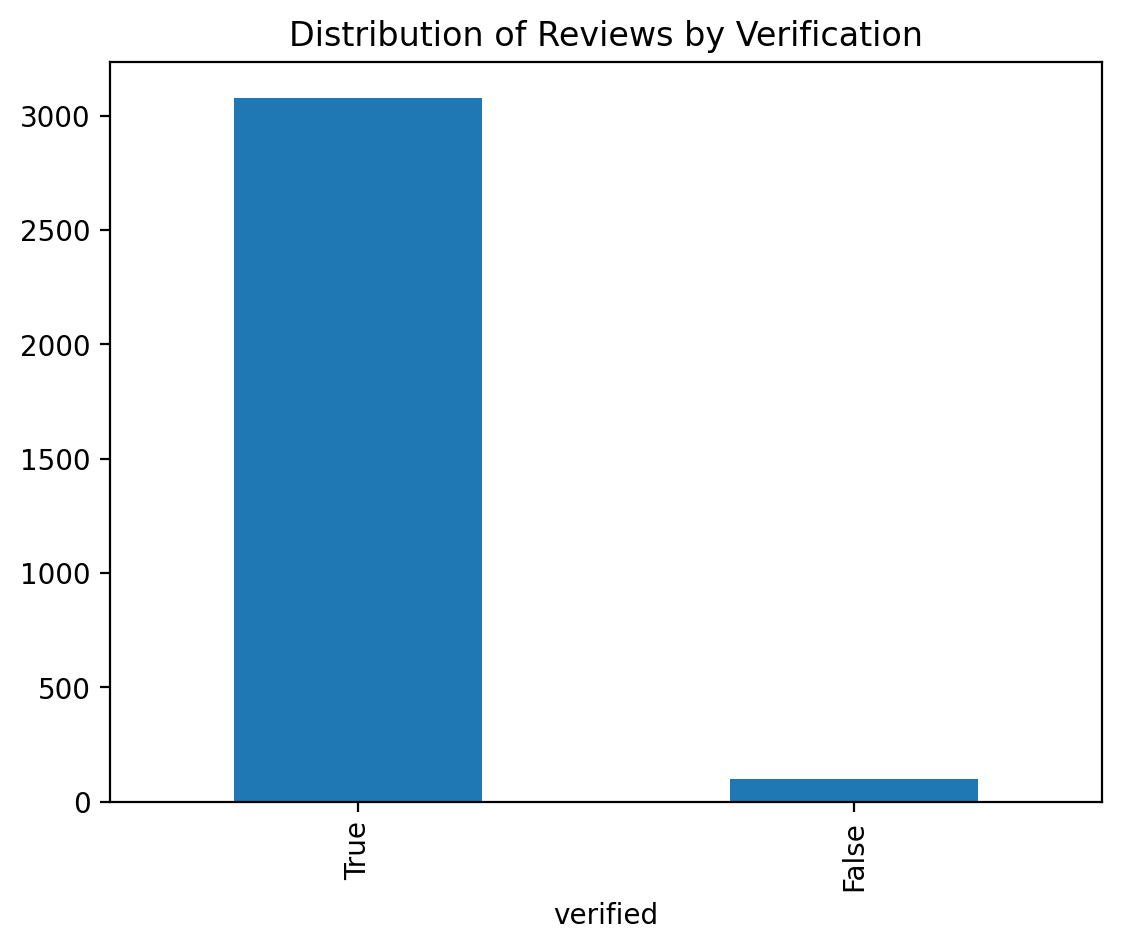

In [5]:
Amazon_D.verified.value_counts().plot(kind='bar', title='Distribution of Reviews by Verification')
plt.show()

In [6]:
Amazon_D = Amazon_D[Amazon_D.verified == True].copy()

In [7]:
Amazon_D.shape

(3079, 12)

Here, it's evident that the previous review count was 3176, and after filtering for only 'True' verifications, it has reduced to 3079. This reduction of 97 reviews indicates the number of entries with 'False' verifications.

#### Drop unnecessary fields

A variety of columns serve as metadata but are not crucial for the subsequent Natural Language Processing (NLP) steps. To streamline the dataset, we must drop down the columns. The significant columns to retain are:

1. Overall : rating of the product
2. reviewer ID : ID of the reviewer, e.g. A2SUAM1J3GNN3B
3. asin : ID of the product, e.g. 0000013714
4. review text : text of the review
5. summary : summary of the review

First will review all the columns in the dataframe.

In [8]:
Amazon_D.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

Now only necessary fields will be kept in the dataset.

In [9]:
cols = ['overall', 'reviewText','summary','reviewerID','asin']
Amazon_D1=Amazon_D[cols].copy()

In [10]:
Amazon_D1.shape

(3079, 5)

In [11]:
Amazon_D1.head()

,overall,reviewText,summary,reviewerID,asin
0,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
1,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
2,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
3,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
4,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K


#### Checking for duplicates

Now it's time to check for duplications.

In [12]:
Amazon_D1.reviewerID.value_counts()

reviewerID
A37K0VP2H8FKOU    16
A3OP70LPLALBKN    16
A3BN0MRGRDKM0J    10
A2YI41MCJB2QCV     9
A3VGHF7VNFBMCQ     9
                  ..
A33GD4H5O1MK6S     5
A12DWXDNZQTKXQ     5
A2VR6SWVSF6K4      5
ALJ66O1Y6SLHA      5
A3CNRM11BHAR1A     4
Name: count, Length: 395, dtype: int64

The total number of unique reviewer IDs are 395 in this case.

In [13]:
Amazon_D1[Amazon_D1.reviewerID == 'A37K0VP2H8FKOU']

,overall,reviewText,summary,reviewerID,asin
372,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B001IKJOLW
373,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B001IKJOLW
735,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0058YEJ5K
736,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0058YEJ5K
1090,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0014F7B98
1091,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0014F7B98
1458,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B009MA34NY
1459,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B009MA34NY
1827,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0092UF54A
1828,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0092UF54A


In [14]:
duplicates = Amazon_D1[Amazon_D1.duplicated(keep=False)]
duplicates.head()

,overall,reviewText,summary,reviewerID,asin
0,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
1,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
2,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
3,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
4,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K


Here, we have reviewed the details of duplicate entries, and now we will proceed to remove the duplicates while retaining the first occurrence of each duplicated row.

The "asin" column indicates the product ID. This is a useful filter against duplicates as it lets us know that the user has duplicate entries for the same product.

In [15]:
Amazon_D1.drop_duplicates(['reviewerID', 'asin'], keep='first', inplace=True)

In [16]:
Amazon_D1.shape

(2953, 5)

In [17]:
Amazon_D1.head()

,overall,reviewText,summary,reviewerID,asin
0,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
5,3,Waaay too small. Will use for futur children!,Oops!,A3W11493KS6Z2L,B000K2PJ4K
10,2,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,A3HX4X3TIABWOV,B000KPIHQ4
11,2,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,AW8UBYMNJ894V,B000KPIHQ4
12,5,We have used these inserts for years. They pr...,Great inserts,A265UZVOZWTTXQ,B000KPIHQ4


Now we have been dropped 126 duplicates from the dataset.

#### Dropping "reviewText" & "asin" columns

In [18]:
Amazon_D2=Amazon_D1[['overall','reviewText','summary']].copy()
Amazon_D2.head()

,overall,reviewText,summary
0,5,Great product and price!,Five Stars
5,3,Waaay too small. Will use for futur children!,Oops!
10,2,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist
11,2,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.
12,5,We have used these inserts for years. They pr...,Great inserts


In [19]:
Amazon_D2.shape

(2953, 3)

### Check NaN Values

Next, we'll verify the presence of any null values within the dataframe.

In [20]:
nan_check = Amazon_D2.isna().sum()
print(nan_check)

overall        0
reviewText    16
summary        0
dtype: int64


We can observe that there are 16 reviews that are Null.

**Drop the NaN Values :**

In [21]:
Amazon_D2.dropna(subset=['reviewText'], inplace=True)

In [22]:
Amazon_D2.shape

(2937, 3)

### Distribution of Ratings

With the initial parts of data subsetting out of the way, we can begin a more technical data exploration. Firstly, we look at the distribution of the reviews. This helps us gauge how much data we have to train that are both positive, negative, and neutral.

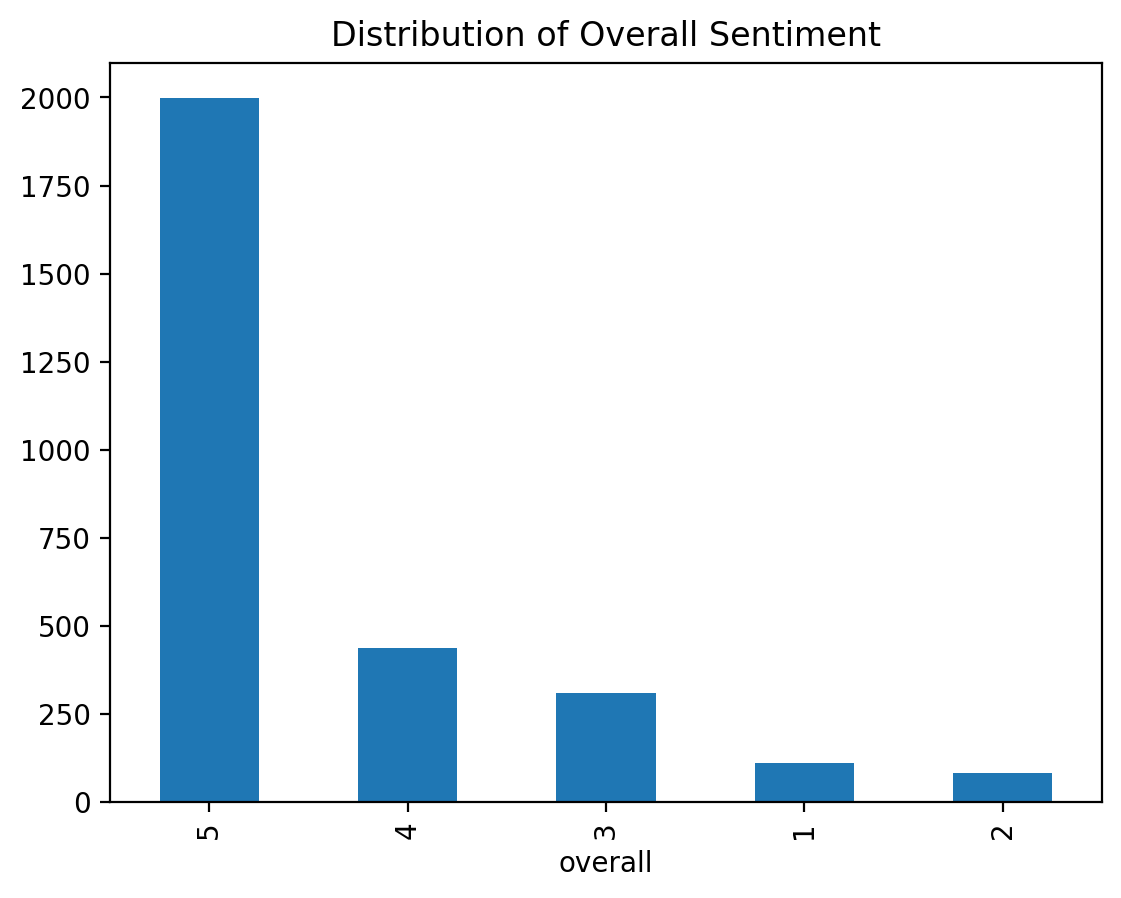

In [23]:
Amazon_D2.overall.value_counts().plot(kind='bar', title='Distribution of Overall Sentiment')
plt.show()

In [24]:
Amazon_D2.overall.value_counts(normalize=True)

overall
5    0.680626
4    0.148791
3    0.105209
1    0.037453
2    0.027920
Name: proportion, dtype: float64

**Note :** Unfortunately, We have significant class imbalance in ratings. 68% overall review classifications are 5 & 15% of overall review classifications are 4 so altogether all positive imapct 83%. Neutral overall review is 10%. Only 7% was negatively rated.

This will be problematic when developing the model as there are much fewer cases of negative and neutral sentiments compared to positive sentiments. However, for now, let's continue with text processing.

## Text Exploration

The objectives of exploring the reviews is to understand the fundamental composition of the datasets through both aggregate and individual investigation. Some of the core things we need to understand include:

1. Use of Punctuations & special characters
2. Use of emojis
3. Lentgh of reviews

**Now, we will proceed to review some of the reviews :**

In [25]:
Amazon_D2.iloc[24,1]

'Did not fit well. Was not comfortable. Switched to "Fruit of the loom". Fruit of the loom are somewhat oversized but fit well and are very comfortable.'

In [26]:
Amazon_D2.iloc[80,1]

'Great shoes. Fit perfectly. Comfortable right from the start. Light weight and perfect for a 12 hour work shift. Good price also.'

#### 1. Use of Punctuations & Special Characters

In tranditional sentiment analysis, punctuation was often used to emphasize the extent of the review. However, in most cases, they were unnecessary. Some useful tools are now being used to convert some punctiation into words. This section explores the use of punctuation.

In [27]:
import re

# searching for all punctuation
Amazon_D2['punctuation'] = Amazon_D2['reviewText'].apply(lambda x: ''.join(set(re.findall(r'[^\w\s]+', str(x) ))) )

In [28]:
Amazon_D2.head()

,overall,reviewText,summary,punctuation
0,5,Great product and price!,Five Stars,!
5,3,Waaay too small. Will use for futur children!,Oops!,!.
10,2,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,.
11,2,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,",."
12,5,We have used these inserts for years. They pr...,Great inserts,.


Lets view only the punctuation column as a list.

In [29]:
list(set(Amazon_D2.punctuation.tolist()))[:15]

['',
 ",.()./'",
 '!.!!',
 '!.!!!',
 ',',
 ",./'",
 ",.().'",
 ',!!',
 ',.(").."\'',
 ',.).(',
 ',$.!',
 '-?...',
 '.',
 ",.).('",
 ',!!!...']

Every review incorporates punctuation, and it appears that a considerable number of these reviews utilize emoticons to convey sentiment. Let me provide examples of reviews along with their respective usage of punctuation and special characters.

**Note:**
There are a few notable items,

1. The use of & is shorthand for and. We could replace the special character.
2. The use of $ denotes the expensiveness or the actual price.

In [30]:
# to make the text readable
pd.set_option('display.max_colwidth', None)  

Amazon_D2[Amazon_D2['punctuation'].str.contains(r'\$|\&') == True]

,overall,reviewText,summary,punctuation
284,5,"Comfortable shoe for both workout sessions and walking. Neither too bulky nor too light. This is my second pair because they fit and have no neon or pink colors, just nice basic B&W.",Comfortable shoe for both workout sessions and walking,",&."
334,5,"I love these shoes my second pair of 40 plus $ shoes and they both have certainly out done the $100 K-swiss that I'm looking to return . The shoes are extremely comfortable, all my clients love them, just wish they came in more colors.",I love these shoes my second pair of 40 plus $ ...,",$.'-"
341,5,I have been wearing for a solid week during my work outs & they are great for comfort and they are light weight.,Love these shoes,&.
468,5,Love these! I have 3 pairs...they're so comfortable - I'm on my feet all day & my feet actually don't hurt at the end of the day when I wear these :)\nI've learned to get these 1/2 size smaller....I'm normally a size 7 and the 6 1/2 fit perfectly,Soooo comfortable.....,!&:)/.......'-
647,5,"Comfortable shoe for both workout sessions and walking. Neither too bulky nor too light. This is my second pair because they fit and have no neon or pink colors, just nice basic B&W.",Comfortable shoe for both workout sessions and walking,",&."
697,5,"I love these shoes my second pair of 40 plus $ shoes and they both have certainly out done the $100 K-swiss that I'm looking to return . The shoes are extremely comfortable, all my clients love them, just wish they came in more colors.",I love these shoes my second pair of 40 plus $ ...,",$.'-"
704,5,I have been wearing for a solid week during my work outs & they are great for comfort and they are light weight.,Love these shoes,&.
831,5,Love these! I have 3 pairs...they're so comfortable - I'm on my feet all day & my feet actually don't hurt at the end of the day when I wear these :)\nI've learned to get these 1/2 size smaller....I'm normally a size 7 and the 6 1/2 fit perfectly,Soooo comfortable.....,!&:)/.......'-
1002,5,"Comfortable shoe for both workout sessions and walking. Neither too bulky nor too light. This is my second pair because they fit and have no neon or pink colors, just nice basic B&W.",Comfortable shoe for both workout sessions and walking,",&."
1052,5,"I love these shoes my second pair of 40 plus $ shoes and they both have certainly out done the $100 K-swiss that I'm looking to return . The shoes are extremely comfortable, all my clients love them, just wish they came in more colors.",I love these shoes my second pair of 40 plus $ ...,",$.'-"


In [31]:
Amazon_D2.shape


(2937, 4)

#### Replacing '&' with 'and'

In [32]:
Amazon_D2['reviewText'] = Amazon_D2['reviewText'].apply( lambda x: str(x).replace('&', 'and')) 

#### Replacing Numbers with Words

Another useful process would be to replace numbers to words. Something like 1 --> one. To achieve this, we can use the inflect library. To do this we perform the following operations:

1. Find all Numbers using regular expression
2. Replace the numbers with words.

In [33]:
import inflect

p = inflect.engine()

# Function to replace a matched object with its word equivalent
def replace_with_words(match):
    number = match.group(0)
    return p.number_to_words(number)

def number_to_words(text):
    # Replace all numbers in the text with their word representation
    return re.sub(r'\b\d+\b', replace_with_words, text)

In [34]:
sample_text = """I give this item 1 star solely because the description for item, and the packaging shows 2 different amount....header states 2 ibs.......picture shows 3 ibs...i 
                  did not really pay attention to header description.....just read back & front label on product..... so i called amazon & the customer service  
                  lady said its suppose to be 3 ibs as shown in picture....well i recieved a 2 ib bag....so she took care of the situation like a professional 
                  ......she also stated she would report this era to the approperiate channels..i would refrain from purchasing this item until the era 
                  is corrected..... the picture shows what i recieved the other picture is what i should have recieved."""

number_to_words(sample_text)

'I give this item one star solely because the description for item, and the packaging shows two different amount....header states two ibs.......picture shows three ibs...i \n                  did not really pay attention to header description.....just read back & front label on product..... so i called amazon & the customer service  \n                  lady said its suppose to be three ibs as shown in picture....well i recieved a two ib bag....so she took care of the situation like a professional \n                  ......she also stated she would report this era to the approperiate channels..i would refrain from purchasing this item until the era \n                  is corrected..... the picture shows what i recieved the other picture is what i should have recieved.'

**Note:**

There are some issues with replace numbers. Some review use numbers to represent prioritization. i.e. - First, 2) second etc. For now, we will ignore this part.

In [35]:
pd.reset_option('^display.', silent=True)

# replaces numbers to words
Amazon_D2['reviewText'] =  Amazon_D2['reviewText'].apply(lambda x:  number_to_words(str(x)))

In [36]:
Amazon_D2.head()

,overall,reviewText,summary,punctuation
0,5,Great product and price!,Five Stars,!
5,3,Waaay too small. Will use for futur children!,Oops!,!.
10,2,Relieved my Plantar Fascitis for three Days. T...,These were recommended by my Podiatrist,.
11,2,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,",."
12,5,We have used these inserts for years. They pr...,Great inserts,.


#### Removing Punctuation

Finally, we can remove all punctuation from the text entirely, leaving only the words.

In [37]:
# replacing punctuation
Amazon_D2['reviewText'] =  Amazon_D2['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
Amazon_D2.drop(columns=['punctuation'], inplace=True)
Amazon_D2.head()

,overall,reviewText,summary
0,5,Great product and price,Five Stars
5,3,Waaay too small Will use for futur children,Oops!
10,2,Relieved my Plantar Fascitis for three Days Th...,These were recommended by my Podiatrist
11,2,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.
12,5,We have used these inserts for years They pro...,Great inserts


### Word Cloud

This section performs a word Cloud to get a glimpse of the frequency of the words in the dataset.

In [38]:
all_text = ' '.join(Amazon_D2.reviewText.tolist())
all_text[:500]

'Great product and price Waaay too small Will use for futur children Relieved my Plantar Fascitis for three Days Then the unbearable pain returned in full force These were recommended by my Podiatrist This is my 6th pair and they are the best thing ever for my plantar fasciitis and resultant neuromas Unfortunately the ones I ordered from SmartDestination must be seconds as they kill my feet The hard plastic insert rubs on the outside edges of my feet I am unable to exchange them as I waited one d'

### Implementing the Word Cloud

In [39]:
from wordcloud import WordCloud, STOPWORDS

# specifying stop words
stop_words = set(STOPWORDS)

# Generating the word cloud
word_cloud = WordCloud(width=1600, height=800, stopwords=stop_words).generate(all_text)

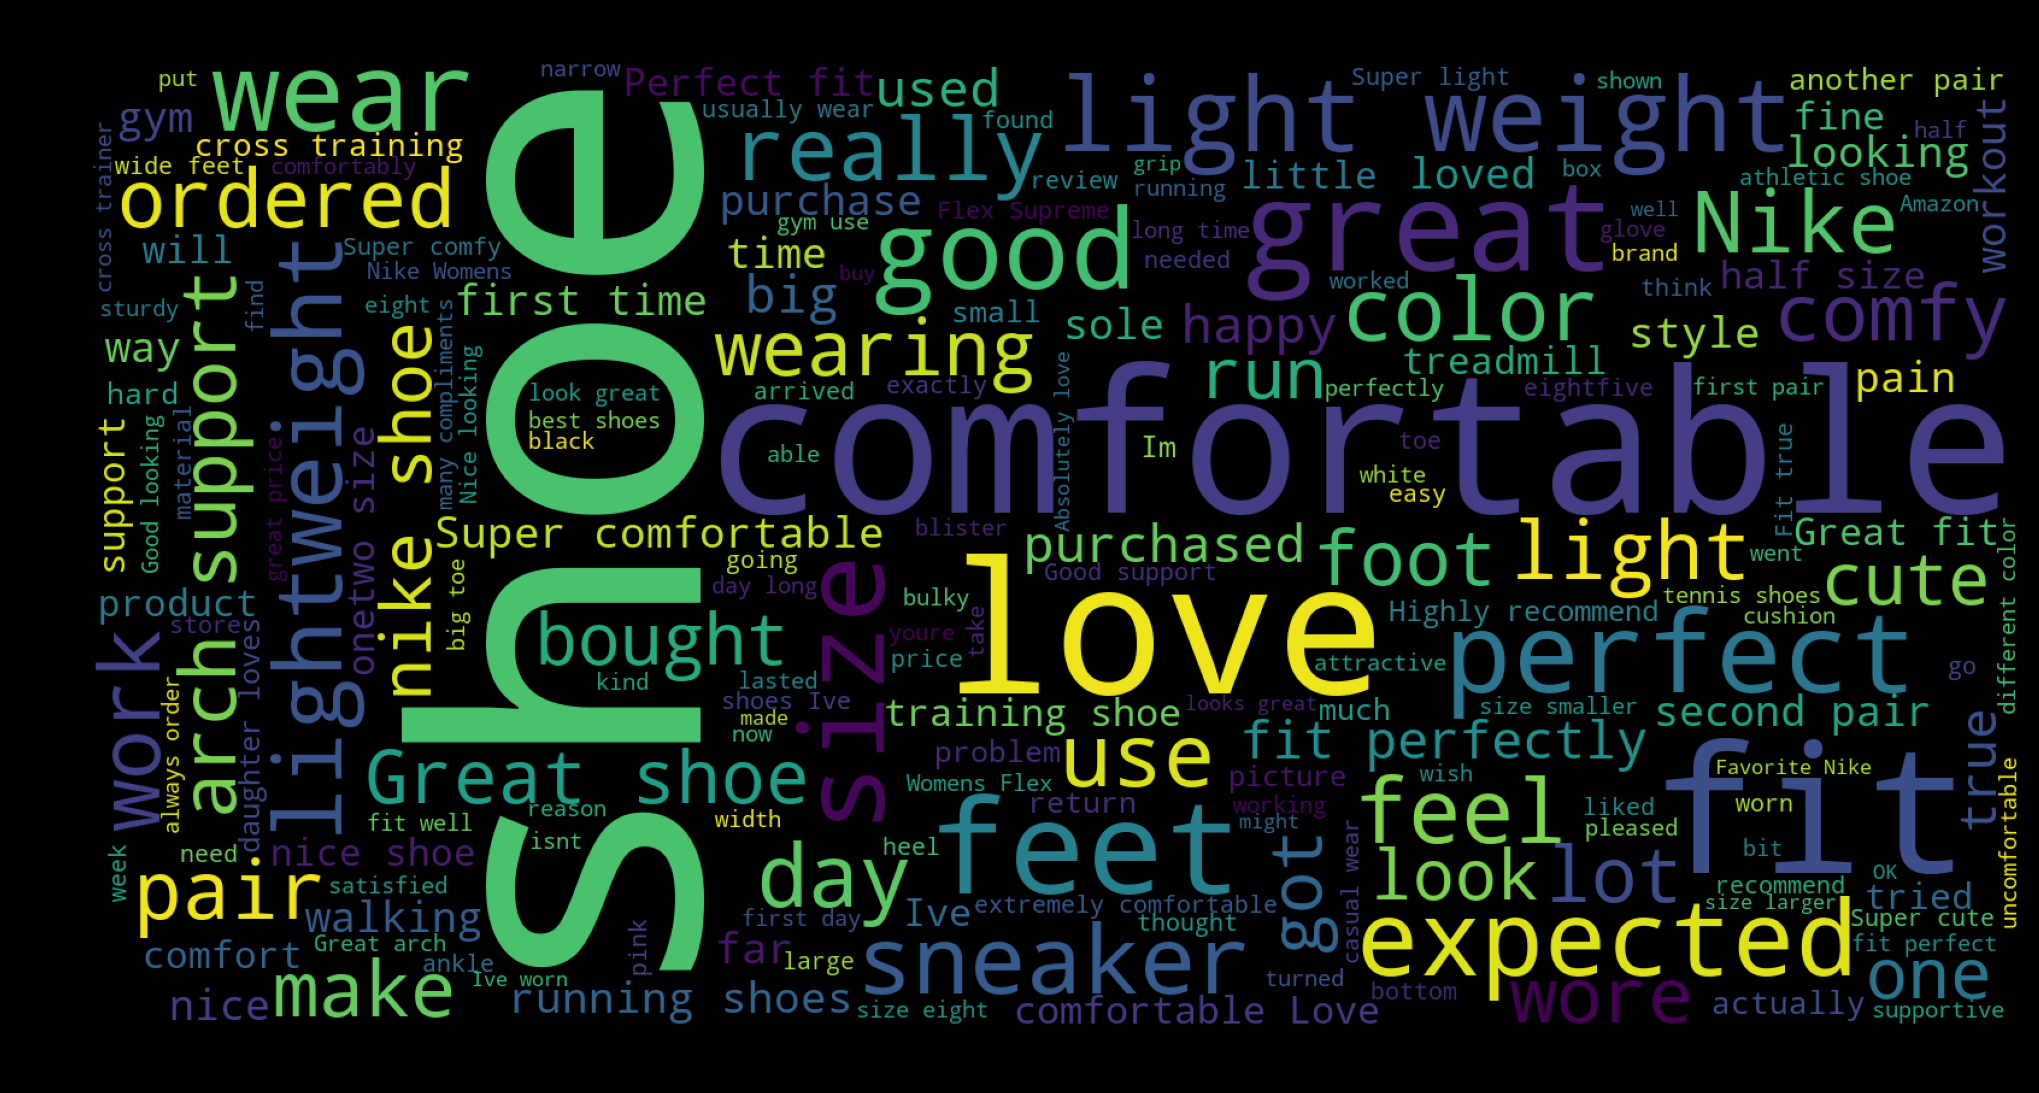

In [40]:
fig = plt.figure(1, figsize=(10,8), facecolor='k')
plt.title('Amazon Reviews')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()

**Note:**
The word cloud above is generated from reviews with the minimal application of NLP processing. To get a better insight, we will need to implement Stemming/lemmatization on the data.

## Stemming & Lemmatization

Stemming and lemmatization refers to the process of breaking down a word into it's root. For example, lovely becomes love. This helps us to significantly reduce the variation of a singular word. Below, I implement lemmatization. I will also use positional tags to further refine the lemmatization process.

In [41]:
import nltk
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()

In [42]:
pos_dict = { "N": wordnet.NOUN,  "V": wordnet.VERB, "J": wordnet.ADJ,  "R": wordnet.ADV}

In [43]:
# lemmatizing review
def lemmatize_review(text):
    new_sentence = []
    for token in nltk.pos_tag(nltk.word_tokenize(text)):
        # remove the stop words
        if token[0] not in stopwords.words('english'):
            pos = pos_dict.get(token[1][0].upper(), wordnet.NOUN)
            lemma = lemmatizer.lemmatize(token[0], pos=pos)
            new_sentence.append(lemma)
            
    return new_sentence

# lemmatizing review
def lemmatize_review(text):
    new_sentence = []
    for token in nltk.pos_tag(nltk.word_tokenize(text)):
        # remove the stop words
        if token[0] not in stopwords.words('english'):
            pos = pos_dict.get(token[1][0].upper(), wordnet.NOUN)
            lemma = lemmatizer.lemmatize(token[0], pos=pos)
            new_sentence.append(lemma)
            
    return new_sentence

#### Lemmatized vs. Raw Text

The example below shows the difference in Lemmatized Text and Raw Text

In [44]:
Amazon_D2.iloc[52, 1]

'It is so handy to have this many reading glasses at such a reasonable price  I like this style reading glasses instead of the ones with nose pieces I find this style more comfortable  These glasses are very nicecheaper than Walmart'

In [45]:
print(lemmatize_review(Amazon_D2.iloc[52, 1]))

['It', 'handy', 'many', 'reading', 'glass', 'reasonable', 'price', 'I', 'like', 'style', 'read', 'glass', 'instead', 'one', 'nose', 'piece', 'I', 'find', 'style', 'comfortable', 'These', 'glass', 'nicecheaper', 'Walmart']


#### Implementing Lemmatization to the Reviews

In [46]:
Amazon_D2['lemmatized_review'] = Amazon_D2.reviewText.apply(lambda x: ' '.join( lemmatize_review(str(x))) )
Amazon_D2.head()

,overall,reviewText,summary,lemmatized_review
0,5,Great product and price,Five Stars,Great product price
5,3,Waaay too small Will use for futur children,Oops!,Waaay small Will use futur child
10,2,Relieved my Plantar Fascitis for three Days Th...,These were recommended by my Podiatrist,Relieved Plantar Fascitis three Days Then unbe...
11,2,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,This 6th pair best thing ever plantar fasciiti...
12,5,We have used these inserts for years They pro...,Great inserts,We use insert year They provide great support


In [47]:
Amazon_D2['lemmatized_review'] = Amazon_D2['lemmatized_review'].apply(lambda x: str(x).lower())

### Implementing WordCloud on Lemmatized Review

Now that we have a lemmatized the text, we can visualize it on a wordcloud.

In [48]:
word_cloud = WordCloud(width=1000, height=800, stopwords=stop_words).generate(' '.join(Amazon_D2.lemmatized_review.tolist()))

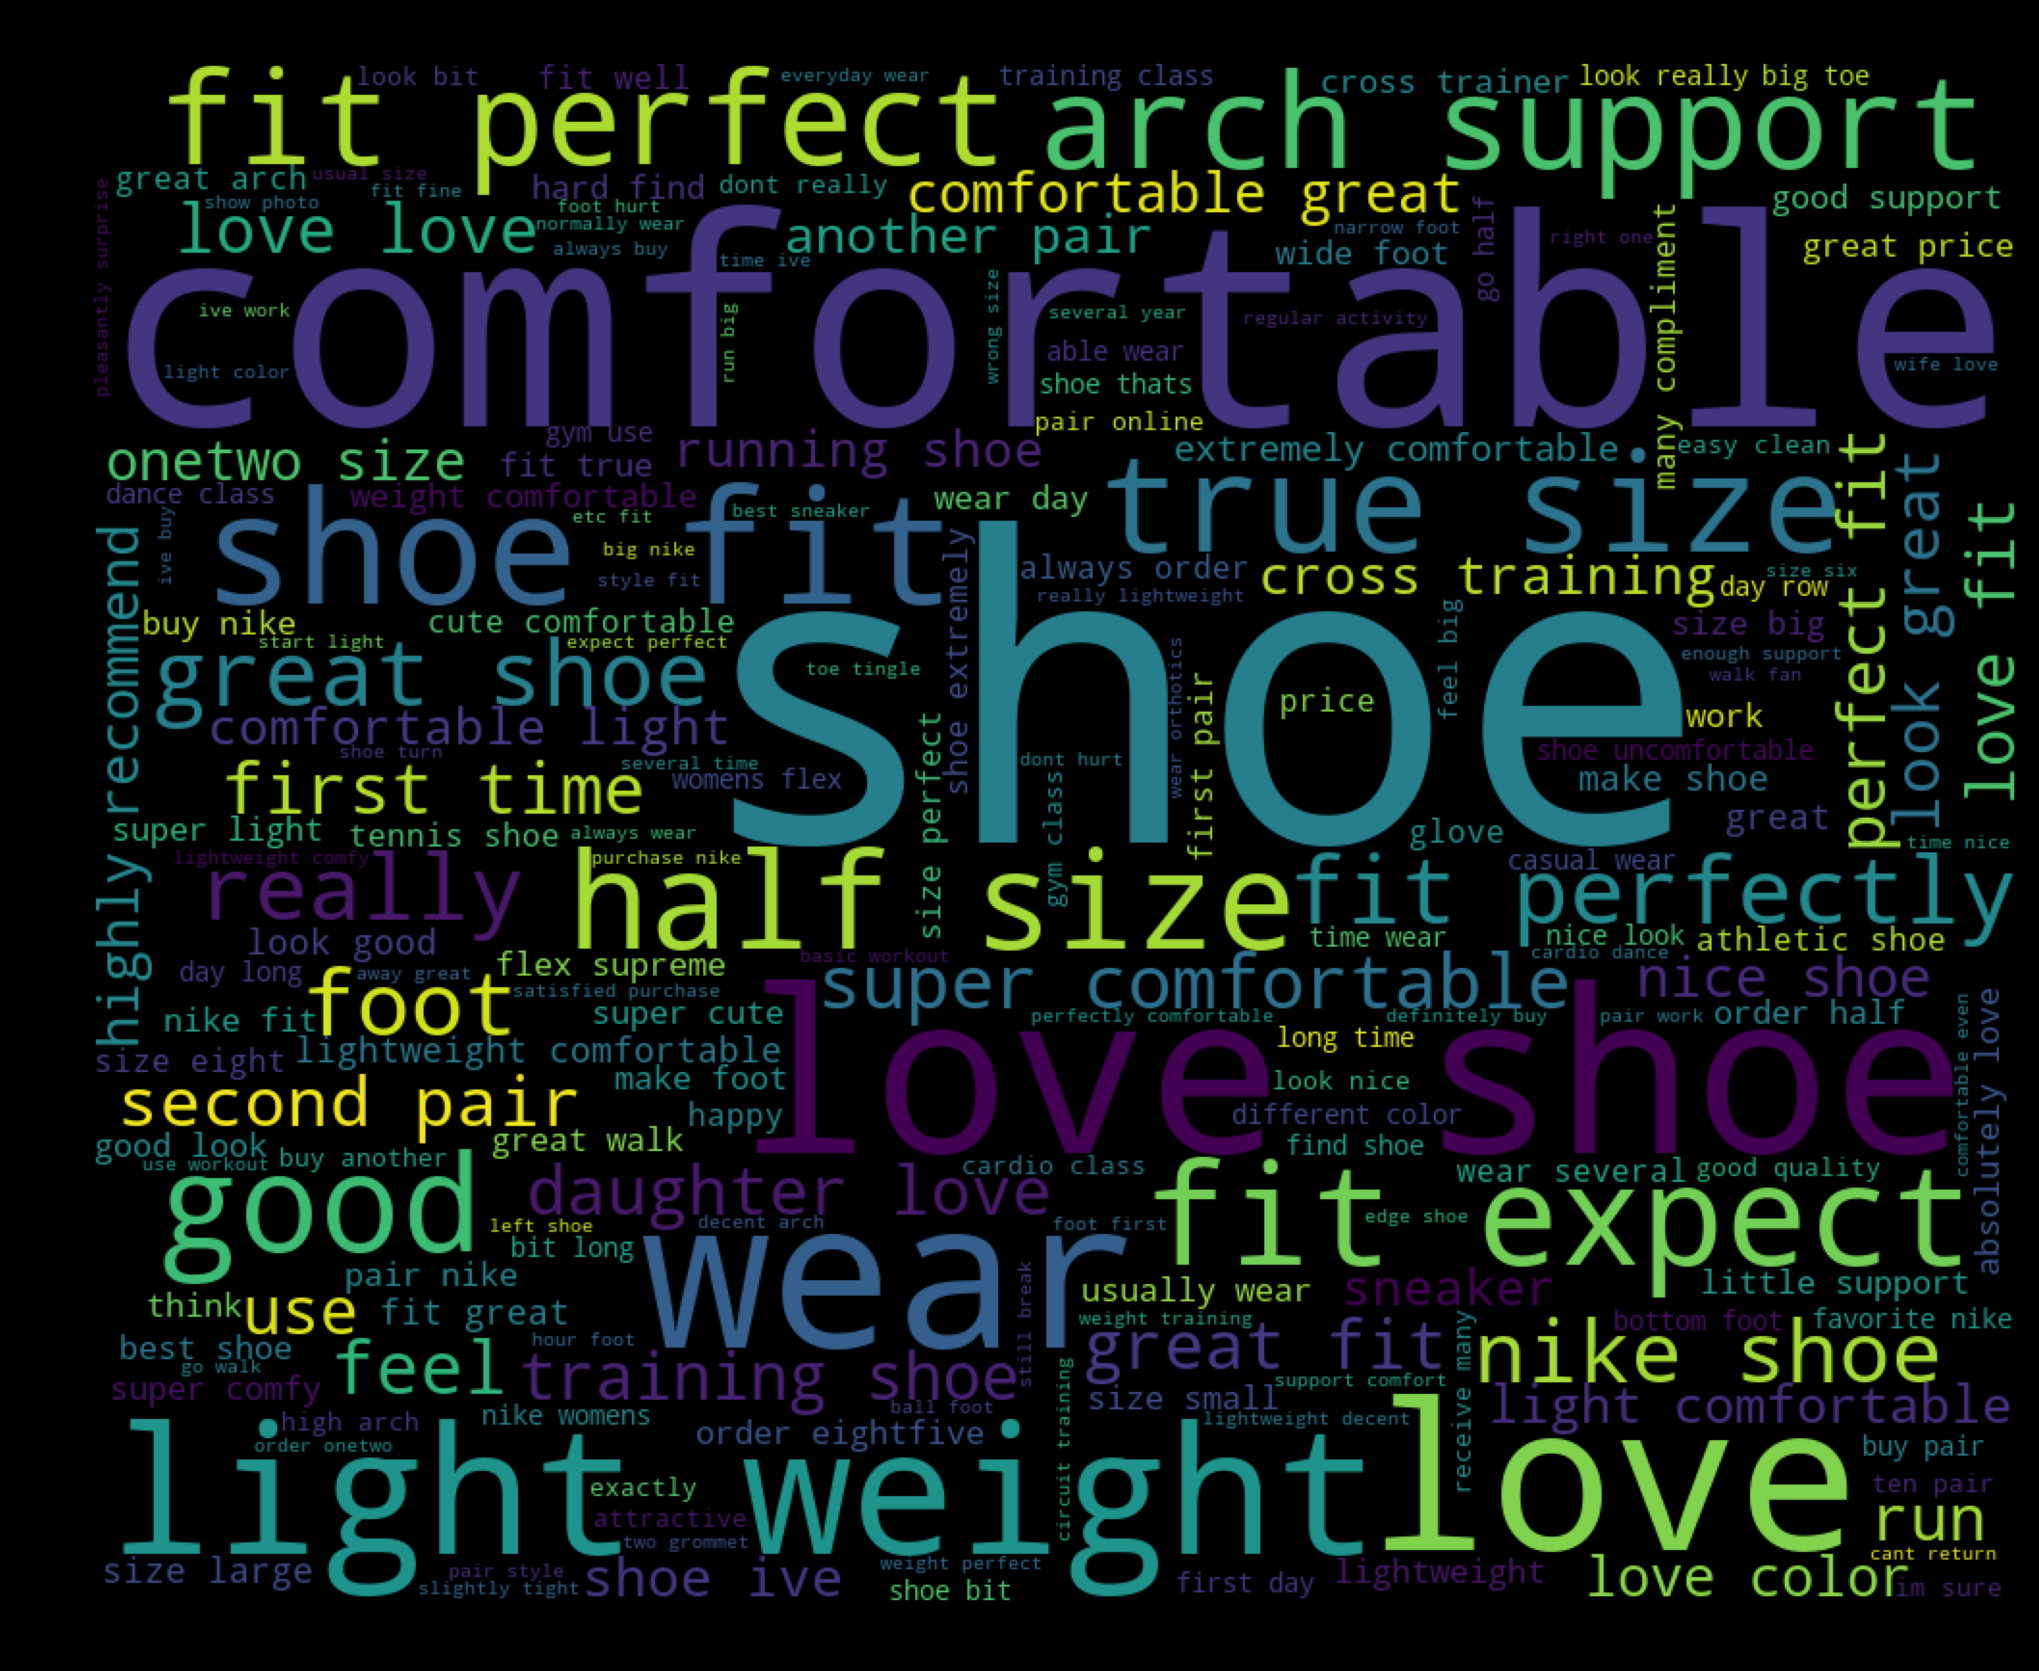

In [49]:
fig = plt.figure(1, figsize=(10, 10), facecolor='k')
plt.title('Amazon Reviews ')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()

In [50]:
Amazon_D2[['lemmatized_review', 'overall']].to_csv('Amazon_D2.csv', index=False)

# **Corpus**

A Corpus refers to a collection of text or speech data that is carefully selected and organized for linguistic analysis.In our specific case, the corpus consists of 2937 reviews.

In [51]:
corpus = Amazon_D2.reviewText.tolist()
  
print("The size of our corpus is:", len(corpus), "\n")
print("The first Review in our corpus is:\n", corpus[0])

The size of our corpus is: 2937 

The first Review in our corpus is:
 Great product and price


### Documents

In [52]:
sample_document = corpus[6]
sample_document

'This is my 6th pair and they are the best thing ever for my plantar fasciitis and resultant neuromas Unfortunately the ones I ordered from SmartDestination must be seconds as they kill my feet The hard plastic insert rubs on the outside edges of my feet I am unable to exchange them as I waited one day too late to use them in my walking shoes'

### Tokenization

A token is a meaningful entity that makes up a document, similar to how words make up sentences. The choice of tokens can vary depending on the task and corpus being analyzed; they can encompass sentences, phrases, words, or even individual characters. In many NLP applications, words serve as the fundamental tokens.

#### Word Tokenization

In [53]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize

print("Word Tokenizer: ", word_tokenize(corpus[0])[:10])
print("Word Punct Tokenizer: ", wordpunct_tokenize(corpus[0])[:10])

Word Tokenizer:  ['Great', 'product', 'and', 'price']
Word Punct Tokenizer:  ['Great', 'product', 'and', 'price']


We can observe that the result is a list of individual words extracted from the document. The output above displays the first 10 words generated by both word tokenizers. It is worth noting that the word_tokenize function does not separate the word 'non-stop' into distinct tokens, whereas the wordpunct_tokenize function does split it into separate tokens.

### Stop Words

Stopwords are words that are part of the grammatical structure of the language but do not carry much semantic meaning to the text. These are often frequent words like 'is' and 'the' that whether they are in or out of the text, the meaning does not change. In NLP, we often deal with stopwords by removing them or selecting what to retain.

In [54]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sentence = "the restaurant at the city served amazing food"
print("With Stop words:", sentence, "\n" )

without_stopwords = [word for word in word_tokenize(sentence) if word not in stopwords.words('english')]
print('Without Stop words:', ' '.join(without_stopwords))

With Stop words: the restaurant at the city served amazing food 

Without Stop words: restaurant city served amazing food


## Combining Preprocessing Steps

We have discussed concepts and techniques to preprocess data for feature extraction. The next step is to put them together into a preprocessing function that can be run against the dataset. Below is an example of one such function.

In [55]:
from nltk.stem import PorterStemmer

In [56]:
porter_stemmer = PorterStemmer()

def cleaningText(text):
    """
    Text Cleaning:
        - Remove Punctuation
        - Remove Numbers
        - Tokenize Text
        - Stem Text
        - Remove Stopwords
    """ 
    text = re.sub("[^a-zA-Z]", " ", text) # Remove Punctuation
    text = re.sub("[0-9]+", "", text) # Remove Numbers
    text = [ porter_stemmer.stem(word.lower()) for word in word_tokenize(text) if word not in stopwords.words('english') ]
    return " ".join(text)

In [57]:
cleaningText("The restaurantant has really amazing service and great food")

'the restaurant realli amaz servic great food'

In [58]:
# running the preprocesing_step
Amazon_D2['clean_review'] = Amazon_D2.reviewText.apply( lambda x: cleaningText( str(x)) )
Amazon_D2[['reviewText', 'clean_review']].head()

,reviewText,clean_review
0,Great product and price,great product price
5,Waaay too small Will use for futur children,waaay small will use futur children
10,Relieved my Plantar Fascitis for three Days Th...,reliev plantar fasciti three day then unbear p...
11,This is my 6th pair and they are the best thin...,thi th pair best thing ever plantar fasciiti r...
12,We have used these inserts for years They pro...,we use insert year they provid great support


### N-grams

N-grams is a process of tokenizing a body of text sequentially to the nth value. When we used word_tokenize, we were effectively performing 1-gram tokenization. Alternatively, we can choose an n-gram that may combine tokens that are more meaningful together. 

In [59]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

document = "New York is truly an amazing city to live in"

[ ' '.join(gram) for gram in ngrams(word_tokenize(document), 2) ]

['New York',
 'York is',
 'is truly',
 'truly an',
 'an amazing',
 'amazing city',
 'city to',
 'to live',
 'live in']

N-grams have the advantage of capturing sentiments like "not bad" or "very good" into a singular token which can be an effective feature for analysis and modeling as compared to individual tokenization.

### Bag of Words

The bag of words is a process that generates features by collecting all the tokens in the corpus and placing them in a bag, thereby creating the vocabulary for the corpus. From this vocabulary, one-hot encoding can be applied to determine the presence or absence of each vocabulary in a document, thus creating features.

Now, let's illustrate this process with a simple corpus consisting of 5 short documents below:

In [60]:
corpus = [ "the restaurant had great food",
           "i love python programming",
           "i prefer R to python",
           "computers are fun to use",
           "i did not like the movie"] 

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

bows_counter = CountVectorizer( analyzer='word',            # Word level vectorizer
                                lowercase=True,             # Lower case the text
                                ngram_range=(1, 1),         # Create 1 n-grams
                                tokenizer= word_tokenize,   # Use this tokenizer
                                stop_words = 'english')     # remove english stopwords

bows_counter.fit(corpus)
features = bows_counter.transform(corpus).toarray()

C:\Users\Narmada\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


The code above implements a count vectorizer that tokenizes words at 1-gram, removes stop words, and creates a one-hot encoding feature set. We can look at the results of our feature conversion by transforming the features into a data frame.

In [62]:
features_df = pd.DataFrame(features, columns=bows_counter.get_feature_names_out())
features_df

,computers,did,food,fun,great,like,love,movie,prefer,programming,python,r,restaurant,use
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,1,0,0,0,0,0,0


Notice that the dataframe has 1-gram tokens and an encoding that shows whether a document contains the token. This set of features can help us model the sentiment of the text.

Another thing to notice is that the matrix can be quite sparse depending on the number of vocabularies and their relative frequency. Therefore, it may be useful to limit n-grams and use features using frequency thresholds.

Term Frequency Inverse Document Frequency a.k.a TF-IDF "TF-IDF is a commonly used weighting technique that assigns weights reflecting the importance of a word to a document. The basis of this technique is the idea that if a word appears frequently across all documents, it is less likely to hold significant information about any specific document. On the other hand, words that appear frequently in one or a few documents and rarely across all documents are considered to have specific importance and should be assigned higher weights.

The mathematical expression of tf-idf (in one of the many forms) is:



$$\text{tf-idf} = \text{frequency}_{t,d} \times \log\left(\frac{\text{total documents}}{\text{total documents containing the term}}\right)$$

It is simply the multiplication of the number of times a word appears in a document by the logarithm of the total number of documents divided by the number of documents that contain the word
Intuitively, high-frequency words that appear in nearly all documents are weighted by the logarithm of 1 (log1), resulting in a weight of zero. Conversely, words with high frequency within a specific document and low frequency across the corpus will have a higher weight.

Let's see an example using our small corpus above.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer( analyzer='word',          # Word level vectorizer
                                    lowercase=True,           # Lowercase the text
                                    tokenizer= word_tokenize) # Use this tokenizer)

tfidf_vectorizer.fit(corpus)
tfidf_features = tfidf_vectorizer.transform(corpus).toarray()

C:\Users\Narmada\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [64]:
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,are,computers,did,food,fun,great,had,i,like,love,movie,not,prefer,programming,python,r,restaurant,the,to,use
0,0.000000,0.000000,0.000000,0.463693,0.000000,0.463693,0.463693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463693,0.374105,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380406,0.000000,0.568014,0.000000,0.000000,0.000000,0.568014,0.458270,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.345822,0.000000,0.000000,0.000000,0.000000,0.516374,0.000000,0.416607,0.516374,0.000000,0.000000,0.416607,0.000000
3,0.463693,0.463693,0.000000,0.000000,0.463693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.374105,0.463693
4,0.000000,0.000000,0.442832,0.000000,0.000000,0.000000,0.000000,0.296570,0.442832,0.000000,0.442832,0.442832,0.000000,0.000000,0.000000,0.000000,0.000000,0.357274,0.000000,0.000000


Notice that we now have weights computed. Because we are using a small corpus, the disparity of the weights is not highly visible but it does show. We will implement this for our review data.

### CountVectorizer and TfidfVectorizer

We can use a vectorizer for text outside of the training data. It will create a vector corresponding to the column names and adds a tfidf value if the word is present in the column and zero otherwise.

In [65]:
bows_counter.transform(['python programming is great']).toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]], dtype=int64)

In [66]:
tfidf_vectorizer.transform(['python programming is great']).toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.61418897, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.61418897, 0.49552379,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

### Features to Matrix

The final step is to apply the tfidf vectorize to the dataset to obtain the feature and convert features into a matrix that can be ingested into a model for training. The example below demonstrates this implementation using the Amazon product reviews dataset.

In [67]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

review_tfidf_vectorizer = TfidfVectorizer( #max_feautures = 1000,        # Return the top 1000 features
                                        analyzer='word',              # Word level vectorizer
                                        lowercase=True,               # Lower case the text
                                        min_df = 5,                   # Use tokens that appear at least 5 times
                                        ngram_range=(1, 2),           # Create 1 n-grams
                                        tokenizer= word_tokenize,     # Use this tokenizer
                                        stop_words = 'english',       # remove english stopwords 
                                        sublinear_tf=1, smooth_idf=1, use_idf=1) # Additional Features

review_tfidf_vectorizer.fit(Amazon_D2.clean_review)
features_df = pd.DataFrame( review_tfidf_vectorizer.transform(Amazon_D2.clean_review).toarray(), 
                            columns=review_tfidf_vectorizer.get_feature_names_out())
features_df.head()

C:\Users\Narmada\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\Narmada\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,abd,abd walk,abit,abit rough,abl,abl wear,absolut,absolut favorit,absolut love,absolut pronationsupn,...,zero,zero support,zumba,zumba class,zumba heel,zumba hiphop,zumba realli,zumba trial,zumba yeah,zumba zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have the features set, we can move on to developing a model to predict the sentiment.

## Train and Test Split

The code below implement a 70-30 percent Train to Test Split

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split

# Check the lengths of features and Amazon_D2.overall
print("Number of samples in features:", len(features))
print("Number of samples in Amazon_D2.overall:", len(Amazon_D2.overall))

# Perform train-test split if lengths are consistent
if len(features) == len(Amazon_D2.overall):
    x_train, x_test, y_train, y_test = train_test_split(features, Amazon_D2.overall, test_size=0.30, stratify=Amazon_D2.overall, random_state=42)
    print("Train set size:", len(x_train))
    print("Test set size:", len(x_test))
    y_train.value_counts(), y_test.value_counts()
else:
    print("Number of samples in features and Amazon_D2.overall are inconsistent.")

Number of samples in features: 5
Number of samples in Amazon_D2.overall: 2937
Number of samples in features and Amazon_D2.overall are inconsistent.


In [71]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( features_df, Amazon_D2.overall, test_size=.30, stratify=Amazon_D2.overall, random_state=42)
y_train.value_counts(), y_test.value_counts()

(overall
 5    1399
 4     306
 3     216
 1      77
 2      57
 Name: count, dtype: int64,
 overall
 5    600
 4    131
 3     93
 1     33
 2     25
 Name: count, dtype: int64)

### Pickling Vectorizer and Features Dataframe

Working with NLP often means working with sparse datasets and vectorizer classes which take a long time to run. Pickling these objects and datasets can help implement checkpoints to save time and compute. To complete this note, we implement pickling for the features dataframe and tfidt_vectorizer we developed.

In [ ]:
import pickle

# vectorizer pickling
vectorizer_object = open( 'review_tfidf_vectorizer.pk' , 'wb')
pickle.dump( review_tfidf_vectorizer , vectorizer_object    )
vectorizer_object.close()

# features_data pickling
feature_object = open( 'features.pk' , 'wb')
pickle.dump( features_df , feature_object )
feature_object.close()

# sentiments_pickling
sentiment_object = open( 'sentiment.pk' , 'wb')
pickle.dump( Amazon_D2['sentiment'] , sentiment_object )
sentiment_object.close()

In [ ]:
import pickle

# Assuming review_tfidf_vectorizer, features_df, and review_data are defined somewhere in your code

# vectorizer pickling
with open('review_tfidf_vectorizer.pk', 'wb') as vectorizer_object:
    pickle.dump(review_tfidf_vectorizer, vectorizer_object)

# features_data pickling
with open('features.pk', 'wb') as feature_object:
    pickle.dump(features_df, feature_object)

# sentiments_pickling
with open('sentiment.pk', 'wb') as sentiment_object:
    pickle.dump(Amazon_D2['sentiment'], sentiment_object)

# 4.0 Methodology

# 5.0 Implementation

# 6.0 Results & Discussion

# 7.0 Conclusion & Future Work